In [ ]:
colfrom google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
!git clone 'https://github.com/shadabsk/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV'

fatal: destination path 'Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV' already exists and is not an empty directory.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
DATADIRTRAIN="/content/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV/Source Code/Dataset/training_set"
DATADIRVALID='/content/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV/Source Code/Dataset/test_set'

In [ ]:
train=ImageDataGenerator(rescale=1/255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid=ImageDataGenerator(rescale=1/255)

In [ ]:
train= train.flow_from_directory(
       DATADIRTRAIN ,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

valid = valid.flow_from_directory(
        DATADIRVALID,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.


In [ ]:
train.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('softmax'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('softmax'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('softmax'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='softmax'))

model.add(Dense(26, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_3 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [ ]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=7)

In [ ]:
model.fit(train,epochs=10,batch_size=32, validation_data = valid,callbacks=[early_stop])

Epoch 1/10
1422/1422 [==============================] - 61s 42ms/step - loss: 3.2586 - accuracy: 0.0381 - val_loss: 3.2585 - val_accuracy: 0.0385
Epoch 2/10
1422/1422 [==============================] - 60s 42ms/step - loss: 3.2587 - accuracy: 0.0391 - val_loss: 3.2590 - val_accuracy: 0.0385
Epoch 3/10
1422/1422 [==============================] - 60s 42ms/step - loss: 3.0494 - accuracy: 0.0895 - val_loss: 2.2697 - val_accuracy: 0.2043
Epoch 4/10
1422/1422 [==============================] - 60s 42ms/step - loss: 2.2218 - accuracy: 0.2041 - val_loss: 2.0511 - val_accuracy: 0.2392
Epoch 5/10
1422/1422 [==============================] - 60s 42ms/step - loss: 2.0447 - accuracy: 0.2386 - val_loss: 1.9391 - val_accuracy: 0.2840
Epoch 6/10
1422/1422 [==============================] - 59s 42ms/step - loss: 1.9317 - accuracy: 0.2934 - val_loss: 1.8472 - val_accuracy: 0.3622
Epoch 7/10
1422/1422 [==============================] - 59s 42ms/step - loss: 1.8396 - accuracy: 0.3505 - val_loss: 1.7248 -

In [ ]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,3.258861,0.036462,3.258496,0.038462
1,3.258790,0.038198,3.258952,0.038462
2,2.744117,0.144066,2.269749,0.204308
3,2.165891,0.214703,2.051131,0.239231
4,2.012818,0.250132,1.939119,0.284000
5,1.909285,0.301648,1.847178,0.362154
6,1.813624,0.374637,1.724816,0.461077
7,1.690107,0.449538,1.597116,0.521692
8,1.574577,0.510703,1.500170,0.573538
9,1.465906,0.570549,1.388925,0.616308


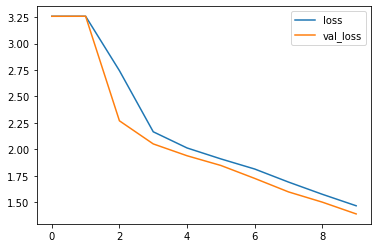

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

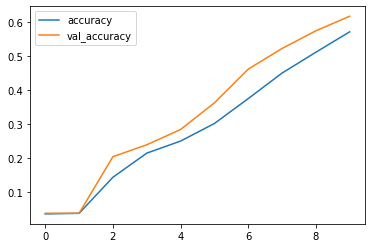

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Jcomp/Final_softmax.h5')

In [ ]:
predictions = model.predict_classes(valid)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


6500

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(valid.class_indices,predictions))

ValueError: ignored

In [ ]:
#from keras.models import load_model
#model1 = load_model("/content/drive/MyDrive/Jcomp/Finalmodel.h5")